In [10]:
import math
import matplotlib.pyplot as plt
import numpy as np 
import seaborn
from matplotlib.animation import FuncAnimation

In [13]:
def alpha(te, cutoff):
    tau = 1 / (2* math.pi * cutoff)
    return 1 / (1 + tau / te) 

def low_pass_filter(a, x, x_prev):
    return a * x + (1-a) * x_prev



MovieWriter imagemagick unavailable; using Pillow instead.


0
0
10
20
30
40
50
60
70
80
90
0


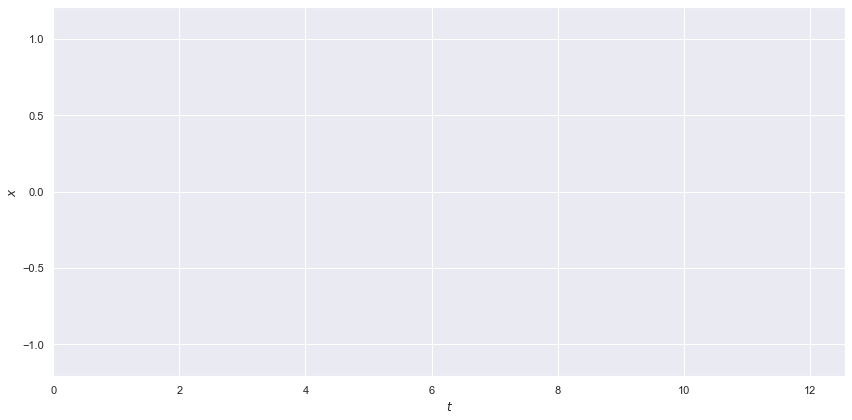

In [14]:
np.random.seed(1)

# Parameters
frames = 100
start = 0
end = 4 * np.pi
scale = 0.1

# The noisy signal
t = np.linspace(start, end, frames)
x = np.sin(t)
x_noisy = x + np.random.normal(scale=scale, size=len(t))

x_hat = np.zeros_like(x_noisy)

# The filtered signal
t_prev = t[0]
x_prev = x_noisy[0]
dcutoff = 1
dx_prev = 0
min_cutoff = 0.004
beta = 0.7

def one_euro_filter(t, x):
    global t_prev, x_prev, min_cutoff, beta, dx_prev
    
    te = t - t_prev
    
    a_d = alpha(te, dcutoff)
    
    dx = (x - x_prev) / te
    dx_prev = low_pass_filter(a_d, dx, dx_prev)
    
    cutoff = min_cutoff + beta * abs(dx_prev)
    a = alpha(te, cutoff)
    x_prev = low_pass_filter(a, x, x_prev)
    t_prev = t
    return x_prev

for i in range(1, len(t)):
    x_hat[i] = one_euro_filter(t[i], x_noisy[i])



# The figure
# https://eli.thegreenplace.net/2016/drawing-animated-gifs-with-matplotlib/
seaborn.set()
fig, ax = plt.subplots(figsize=(12, 6))
ax.set(
    xlim=(start, end),
    ylim=(1.1*(-1-scale), 1.1*(1+scale)),
    xlabel="$t$",
    ylabel="$x$",
)
fig.set_tight_layout(True)
signal, = ax.plot(t[0], x_noisy[0], 'o')
filtered, = ax.plot(t[0], x_hat[0], '-')


def update(i):
    if i % 10 == 0:
        print(i)
    signal.set_data(t[0:i], x_noisy[0:i])
    filtered.set_data(t[0:i], x_hat[0:i])

    return signal


anim = FuncAnimation(fig, update, frames=frames, interval=100)
anim.save('one_euro_filter.gif', dpi=80, writer='imagemagick')
plt.savefig("one_euro_filter.png", dpi=300) 